In [49]:
from tnia.deconvolution.psfs import gibson_lanni_3D
from tnia.plotting.projections import show_xyz_max
from tnia.io.tifffile_helper import open_ij3D
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

In [50]:
input_name="D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\nuclei1_out_c00_dr90_image.tif" 
input_name="D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\nuclei4_out_c90_dr10_image.tif"
im, x_voxel_size, y_voxel_size, z_voxel_size = open_ij3D(input_name)

In [51]:
print(x_voxel_size, z_voxel_size)

0.1238060147933331 0.2


(65, 101, 101)


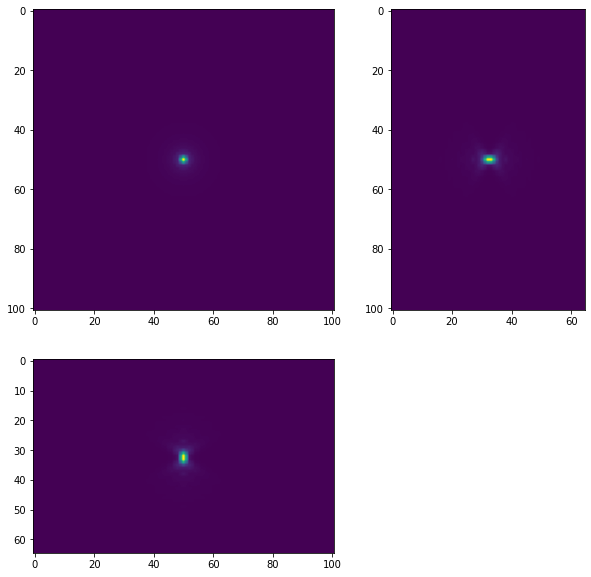

In [52]:
xy_psf_dim=101
z_psf_dim=65

NA=1.3
ni=1.4
ns=1.4

psf = gibson_lanni_3D(NA, ni, ns, x_voxel_size, z_voxel_size, xy_psf_dim, z_psf_dim, 0, 0.65)
#psf = gibson_lanni_3D(NA, ni, ns, xy_pixel_size, xy, zv, 0, 0.65)
#plt.imshow(psf_xyz[int(size[0]/2),:,:])
show_xyz_max(psf)
print(psf.shape)

In [47]:
psf.sum()

0.9999999999999994

get lib
get lib


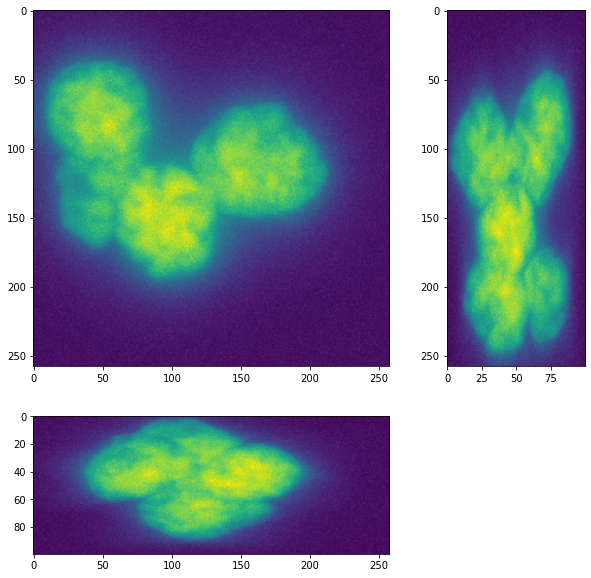

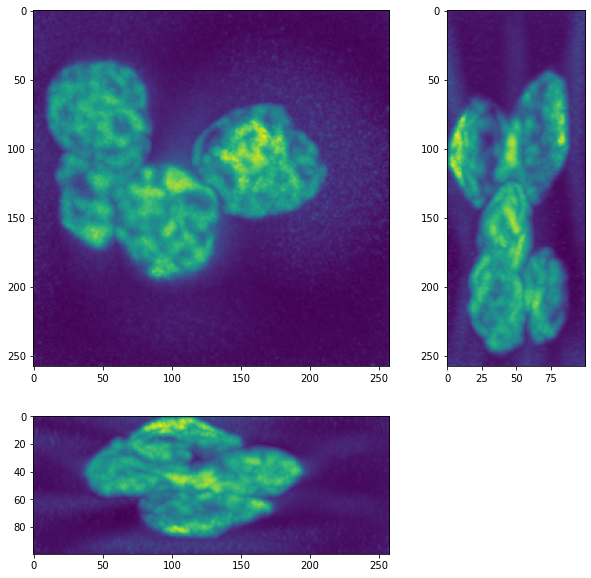

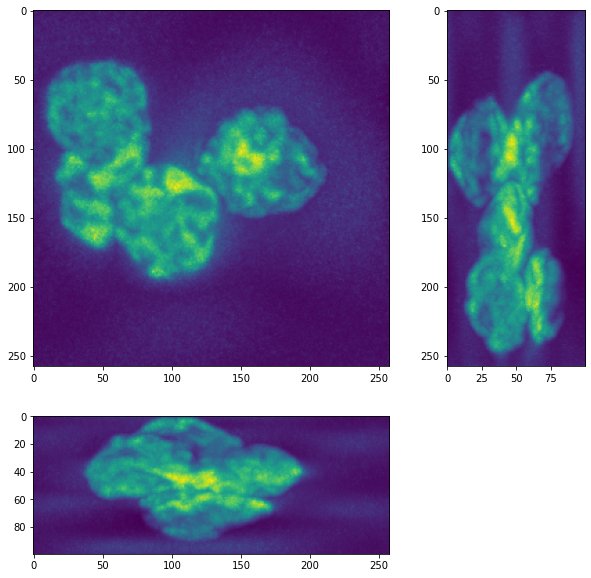

In [48]:
decon1=richardson_lucy_nc(im, psf, 100, 0)
decon2=richardson_lucy(im, psf, 100, 0)
show_xyz_max(im)
show_xyz_max(decon1)
show_xyz_max(decon2)